In [2]:
import sys
sys.path.append('..')
from core.utils import load_save_json

/home/iamlxb3/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


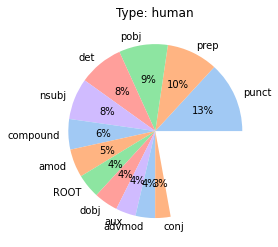

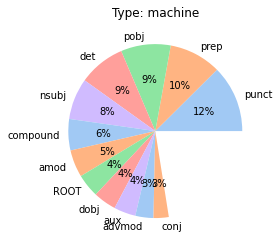

In [11]:
"""Check dep/pos/ner""""

import matplotlib.pyplot as plt
import seaborn as sns
import pdb

dataset = 'en_grover' # en_grover, cn_novel_5billion
parse_choice = 'dep'

for author in ('human', 'machine'):
    # load data
    data_path = f'../result/static_data_analysis/{dataset}_{parse_choice}_{author}.json'
    data = load_save_json(data_path, 'load', verbose=0)
    data = list(data.items())
    data = sorted(data, key=lambda x:x[1], reverse=True)
    # print(data)

    TOP_N = 12

    #define data
    value = [x[1] for x in data][:TOP_N]
    description = [x[0] for x in data][:TOP_N]

    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    ax = plt.pie(value, labels = description, colors = colors, autopct='%.0f%%')
    #plt.title("PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
    # ax.set_title(f'Author: {author}')
    plt.title('Type: ' + author)
    # pdb.set_trace()
    plt.show()

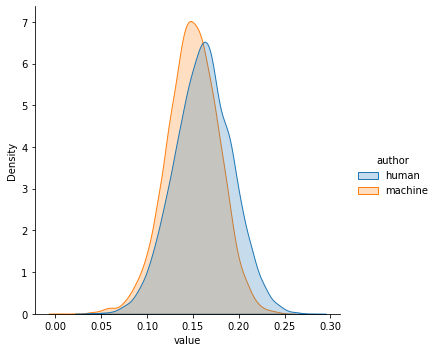

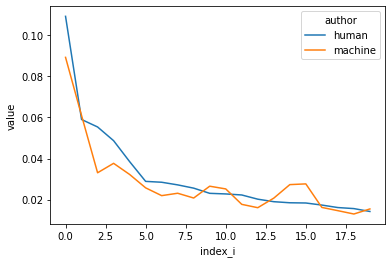

In [39]:
"""Check stopwords"""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'cn_novel_5billion' # en_grover, cn_novel_5billion, en_writing_prompt
sen_ratio_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_stopword_sen_ratio.csv')
sns.displot(sen_ratio_data, x="value", kind="kde", hue='author',fill=True)
plt.show()

stopword_ratio_data = pd.read_csv(f'../result/static_data_analysis/{dataset}_stopword_ratio.csv')
new_stopword_ratio_data = []
keep_N = 20
for author, author_data in stopword_ratio_data.groupby('author'):
    author_data = author_data[:keep_N]
    new_stopword_ratio_data.append(author_data)
new_stopword_ratio_data = pd.concat(new_stopword_ratio_data)
# print(stopword_ratio_data)
#stopword_ratio_data['index'] = stopword_ratio_data.index
sns.lineplot(data=new_stopword_ratio_data, x="index_i", y='value', hue='author')
plt.show()

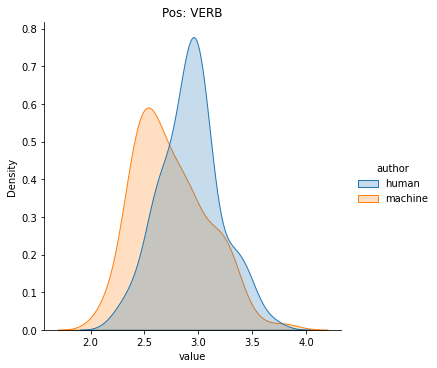

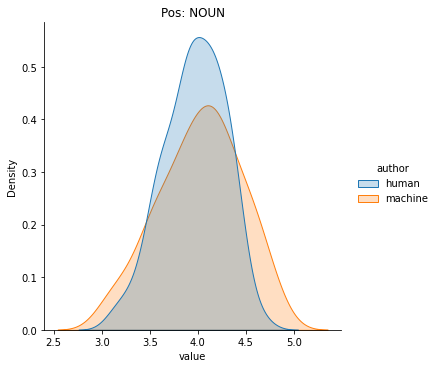

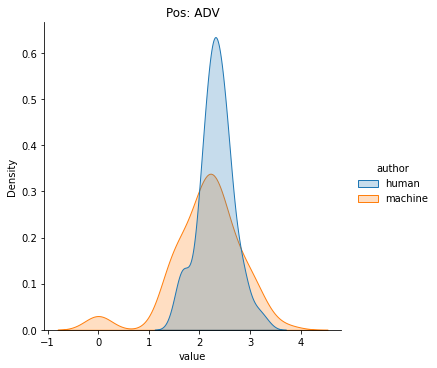

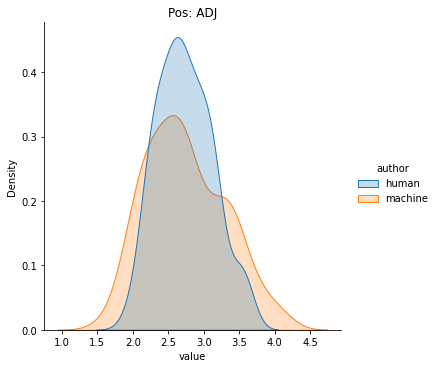

In [50]:
"""Check concreteness"""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'en_writing_prompt' # en_grover, en_writing_prompt
concrete_df = pd.read_csv(f'../result/static_data_analysis/{dataset}_concreteness.csv')
target_pos = ('VERB', 'NOUN', 'ADV', 'ADJ')
for pos in target_pos:
    pos_df = concrete_df[concrete_df['pos']==pos]
    # print(pos_df)
    sns.displot(pos_df, x="value", kind="kde", hue='author',fill=True)
    plt.title('Pos: ' + pos)
    plt.show()